### Introducing Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To minimize the function, it moves iteratively to the negative of the gradient of the function.

In this project we are going to apply logistic regression model and use gradient descent to find the convergence.

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import functools
import numpy as np
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

#### Load all the data into Python

The dataset includes two files: household and individual data

#### Household data

In [2]:
hh_train=pd.read_csv('D:\Sam\Data Courses and Practice\Data Competition\World Bank\A_hhold_train.csv')
#household training data

In [3]:
hh_train.head()

,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
1,82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
2,9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
3,10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
4,16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


Column 'id' represents different families. As for features, each column in the dataset corresponds with a survey question. Each question is either multiple choice, in which case each choice has been encoded as random string, or it is a numeric value. Most of the questions are about consumable goods

In [4]:
hh_train.shape

(8203, 346)

Household data contains 8203 observations and 346 features

#### Individual dataset

In [5]:
ind_train=pd.read_csv('D:\Sam\Data Courses and Practice\Data Competition\World Bank\A_indiv_train.csv')
#individual training data 

In [6]:
ind_train.head()

,id,iid,HeUgMnzF,CaukPfUC,MzEtIdUF,gtnNTNam,SWoXNmPc,eXbOkwhI,OdXpbPGJ,XONDGWjH,...,ukWqmeSS,qqVibbSA,MgCoFhXK,rFpoTXAq,RXcLsVAQ,rQWIpTiG,XizJGmbu,xqUooaNJ,poor,country
0,80389,1,XJsPz,mOlYV,UFoKR,SSvEP,onRNG,YXCNt,4.0,oArAw,...,181,QQdHS,uEstx,Hikoa,zQvdC,xUYIC,juMSt,dSJoN,True,A
1,80389,2,XJsPz,mOlYV,axSTs,CXizI,onRNG,YXCNt,4.0,ccbZA,...,141,QQdHS,uEstx,Hikoa,zQvdC,xUYIC,juMSt,JTCKs,True,A
2,80389,3,TRFeI,mOlYV,axSTs,CXizI,NDnCs,YXCNt,4.0,fOUHD,...,41,QQdHS,gCSRj,Hikoa,zQvdC,rkLqZ,juMSt,JTCKs,True,A
3,80389,4,XJsPz,yAyAe,FRcdT,CXizI,onRNG,YXCNt,NaN,fOUHD,...,16,QQdHS,uEstx,Hikoa,zQvdC,jVHyH,GtHel,JTCKs,True,A
4,39883,1,XJsPz,mOlYV,UFoKR,HIvIU,onRNG,YXCNt,4.0,oArAw,...,381,QQdHS,uEstx,Hikoa,zQvdC,xUYIC,juMSt,UaIsy,False,A


In [7]:
ind_train.shape

(37560, 44)

Individual data contains 37560 observations and 44 features

#### For both datasets, an assessment of whether or not the household is above or below the poverty line is in the poor column. This binary variable is the target variable for this dataset. Our prediction will be made at the household level.

In [9]:
target=hh_train.poor

In [10]:
hh=hh_train
hh=hh.drop(['country','poor'],axis=1)

In [11]:
ind=ind_train
ind=ind.drop(['iid','country','poor'],axis=1)

### Data Preprocessing

#### Dealing with missing value

In [12]:
def check_missing(df):
    missing_count=pd.DataFrame(df.isnull().sum())
    missing_count=missing_count.rename(columns={0:'missing'})
    missing_count=missing_count.sort_values(by='missing',ascending=False)
    missing_percentage=missing_count.copy()
    missing_percentage['missing']=missing_percentage['missing']/len(df)
    return missing_percentage

In [13]:
check_missing(ind).head()

,missing
OdXpbPGJ,0.16688
id,0.00000
XBldkztv,0.00000
QvgxCmCV,0.00000
kvMGuSDN,0.00000


In [14]:
check_missing(hh).head()

,missing
id,0.0
szowPwNq,0.0
uZGqTQUP,0.0
nqndbwXP,0.0
CHAQHqqr,0.0


Since there is only one feature in household data has missing value and the missing percentage is only 16.7%, we decided to impute the mode value.

No missing values in the individual dataset.

In [15]:
ind['OdXpbPGJ']=ind['OdXpbPGJ'].fillna(ind.OdXpbPGJ.mode()[0])
#replace missing values with the most common value in 'OdXpbPGJ'

In [16]:
check_missing(ind).head()

,missing
id,0.0
jYpOAjPW,0.0
QvgxCmCV,0.0
kvMGuSDN,0.0
AjYsrafY,0.0


Check again, there are no missing values any more.

#### One-hot encoding on categorical features

In [17]:
#seperare numerical features and categorical features in individual data
ind_num_col=ind.columns[ind.dtypes!=object].values
ind_cate_col=ind.columns[ind.dtypes==object].values
#seperare numerical features and categorical features in household data
hh_num_col=hh.columns[hh.dtypes!=object].values
hh_cate_col=hh.columns[hh.dtypes==object].values

In [18]:
hh_dummy=pd.get_dummies(hh[hh_cate_col])

hh=pd.concat([hh_dummy,hh[hh_num_col]],axis=1)
#one hot encoding on household data

In [19]:
ind_dummy=pd.get_dummies(ind[ind_cate_col])

ind=pd.concat([ind_dummy,ind[ind_num_col]],axis=1)
#one hot encoding on individual data
ind=ind.groupby('id').mean()
#ready for data merge

#### Merge household data with indevidual data

#### Questions across the two survey levels are different, so it may be the case that generating new household level features by aggregating the individual features that will create better predictors.

In [20]:
data=hh.merge(ind,left_on='id',right_index=True)

data=data.drop('id',axis=1)

data=data.applymap(lambda x:float(x))

#Finally, merge predictors with response
model_data=pd.concat([data,target*1],axis=1)

#model_data,prediction_data=all_data.iloc[:6000,:],all_data.iloc[6000:,:]

In [21]:
model_data.shape

(8203, 1132)

After merging two file, we got a dataset with 8203 observations and 1132 features

### User defined function

#### Define a function to randomly sample training data and test data out of original data

In [27]:
def resample(model_data,size=0.5):
    sample_train=model_data.sample(frac=size)
#    sample_train=sample_train.reset_index()

    test_index=[i for i in model_data.index if i not in sample_train.index]

    sample_test=model_data.iloc[test_index,:]
    
    sample_test=sample_test.reset_index()
    sample_train=sample_train.reset_index()
    
    return sample_train,sample_test
#define a function to randomly sample training data and test data out of original data

#### Define a sigmiod function

In [28]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### Define a function to transform data into matrix form to implement vectorization for later caculation

In [29]:
def trans_data(data):
    new_data=data.values
    features=new_data[:,0:-1]
    response=new_data[:,-1]
    features=np.insert(features,0,1,axis=1)
    return features,response
#transform data into matrix form to implement vectorization later

#### Define a function to calculate gradient descent

In [30]:
def gradient_descent(features,response,a,t):
    response = response.reshape(len(response),1)
    n=np.shape(features)[-1]
#initialize weights
    weights = np.zeros((n, 1))
#iteration times
    iterations = t
    acc=[]
    ll=[]
    for i in range(iterations):
#define learning rate
        alpha=a
#alpha=a/(1+i)+0.01---changing stepsize
        y = sigmoid(features.dot(weights))  
        weights = weights + alpha * (features.transpose().dot((response - y)))        
        y_pred_prob=sigmoid(features.dot(weights))
        ll.append(log_loss(response,y_pred_prob))
        y_pred=(y_pred_prob>0.5)*1
#threshold here is 0.5 which could be changed later 
        acc.append(np.mean(y_pred==response))
#acc.append(np.mean(y_pred==response))
    return weights,ll,acc

#### Define a function to do feature scaling

In [31]:
def standardize(data):
    scaler=StandardScaler()
    scaler.fit(data)
    norm_data=scaler.transform(data)
    return norm_data
#feature scaling function

Now we have all the components to build Logistic Regression model.

### Build a logistic regression model with gradient descent

#### Define a logistic regression function and return coefficients, log loss and accuracy

In [529]:
def LR_GD(data,a,t):
#a is the stepsize, namely learning rate
#t is the iteration times
    data_target=data.poor
    data_predictors=data.drop('poor',axis=1)
#seperate response and predictors
    scaled=standardize(data_predictors)
#perform feature scaling
    new_data=pd.concat([pd.DataFrame(scaled),data_target],axis=1)
#transform the data into matrix 
    features,response=trans_data(new_data)
#ready to input data in LR model
    weights,ll,acc=gradient_descent(features,response,a,t)    
    return weights,ll,acc

Now, we are going to do experiments with different stepsize and interations. We use 70% data as training set

In [530]:
#get training data and test data
sample_train,sample_test=resample(model_data,0.7)
#sample_train,sample_test=model_data.iloc[:6000,:],model_data.iloc[6000:,:]

### Experiment 1: 200 iterations and stepsize 0.001

In [531]:
n=200
#we run 200 iterations
t=0.001
#the stepsize is 0.0005 in this experiment
start=time.clock()
w,ll,acc=LR_GD(sample_train,t,n)
#w is the weight vector
#ll is log loss error vector on the test data (get one from each of the 200 iterations)
#acc is the accuracy vector on the training data (get one from each of the 200 iterations)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 3.6536600000001727s


Text(0.5,1,'Convergence')

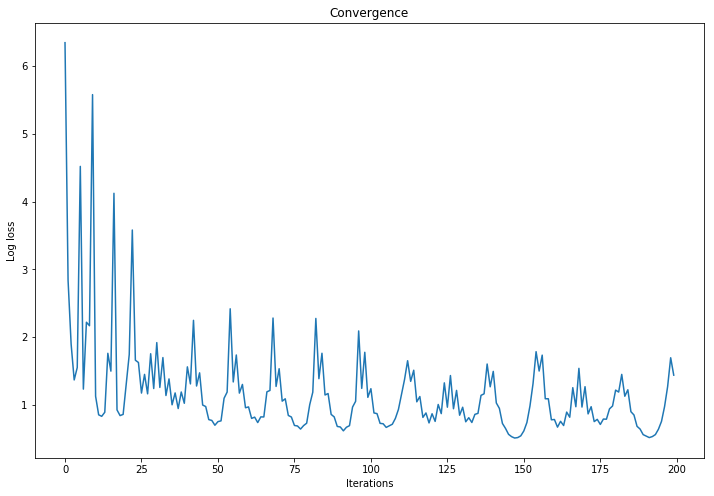

In [532]:
plt.figure(figsize=(12,8))
plt.plot(range(n),ll)
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Convergence')

### Experiment 2: 200 iterations and stepsize 0.0005

In [533]:
n=200
t=0.0005
start=time.clock()
w,ll,acc=LR_GD(sample_train,t,n)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 3.244472999999971s


Text(0.5,1,'Convergence')

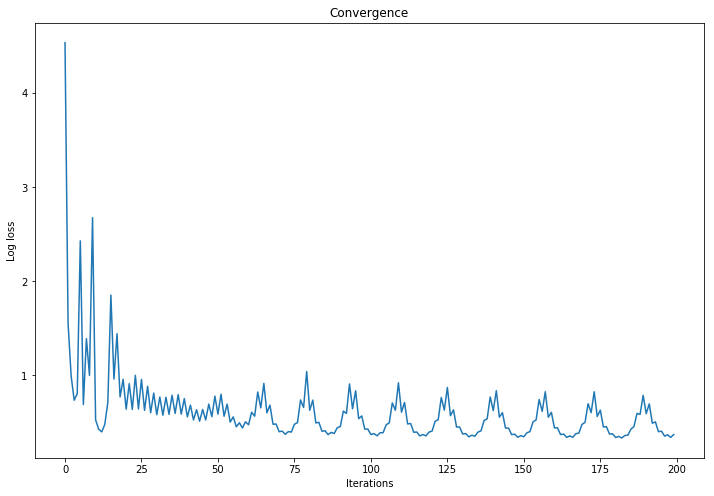

In [534]:
plt.figure(figsize=(12,8))
plt.plot(range(n),ll)
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Convergence')

### Experiment 3: 200 iterations and stepsize 0.0001

In [535]:
n=200
t=0.0001
start=time.clock()
w,ll,acc=LR_GD(sample_train,t,n)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 3.7503639999999905s


Text(0.5,1,'Convergence')

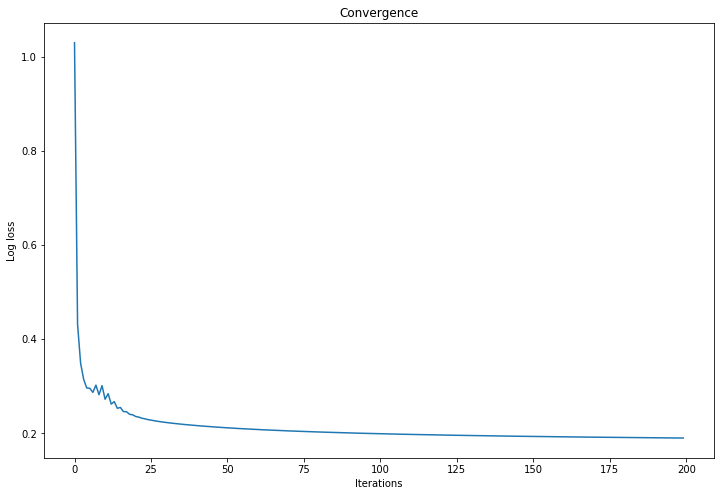

In [536]:
plt.figure(figsize=(12,8))
plt.plot(range(n),ll)
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Convergence')

## Experiment 4: 500 iterations and stepsize 0.0001

In [537]:
n=500
t=0.0001
start=time.clock()
w,ll,acc=LR_GD(sample_train,t,n)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 9.14943900000003s


Text(0.5,1,'Convergence')

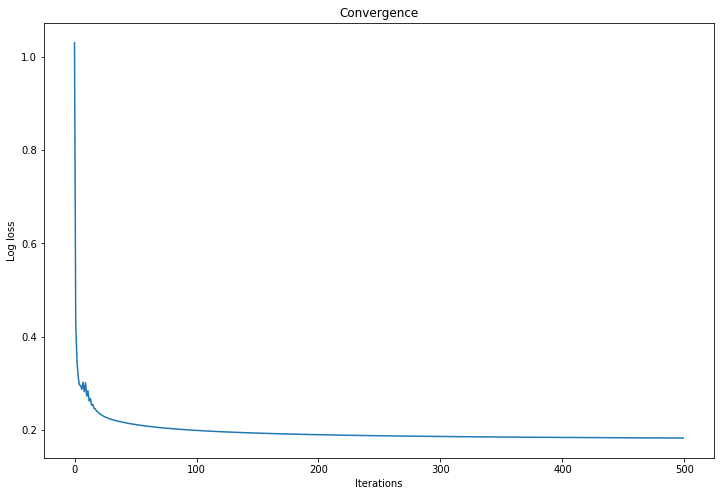

In [538]:
plt.figure(figsize=(12,8))
plt.plot(range(n),ll)
plt.xlabel('Iterations')
plt.ylabel('Log loss')
plt.title('Convergence')

#### Experiment result: with 500 iterations and 0.0001 stepsize, we can get a smoother plot.

### Now we are going to compare our model with the logistic regression model in sikit-learn

#### Our model (logistic regression with gradient descent)

In [562]:
sample_train,sample_test=resample(model_data,0.7)
n=300
t=0.00005
start=time.clock()
w,ll,acc=LR_GD(sample_train,t,n)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 5.973457999999937s


In [563]:
#check the result
test_target=sample_test.poor
test_predictors=sample_test.drop('poor',axis=1)
scaled=standardize(test_predictors)
scaled=np.insert(scaled,0,1,axis=1)
#insert intercept term
prob=sigmoid(scaled.dot(w))
#calculate the classification probability
logloss=log_loss(test_target,prob)
accuracy=np.mean(((prob.reshape((1,len(prob)))[0]>0.5)*1)==test_target.values)
print('The log loss error on the training data is:',ll[-1])
print('The accuracy on the training data is:',acc[-1])
print('')
print('The log loss error on the test data is:',logloss)
print('The accuracy on the test data is:',accuracy)

The log loss error on the training data is: 0.20421557118589864
The accuracy on the training data is: 0.9122218835720817

The log loss error on the test data is: 0.3056689311869688
The accuracy on the test data is: 0.8726386349786716


#### Logistic Regression model using scikit-learning.

In [67]:
def LR_sklearn(sample_train,sample_test):
    X_train=sample_train.iloc[:,:-1]
    y_train=sample_train.iloc[:,-1]
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    
    prob_train=lr.predict_proba(X_train)
    train_ll=log_loss(y_train,prob_train)
    
    pred_train=lr.predict(X_train)
    train_acc=np.mean(pred_train==y_train)
    
    X_test=sample_test.iloc[:,:-1]
    y_test=sample_test.iloc[:,-1]
    
    prob_test=lr.predict_proba(X_test)
    test_ll=log_loss(y_test,prob_test)
    
    pred_test=lr.predict(X_test)
    test_acc=np.mean(pred_test==y_test)
    
    return train_ll,test_ll,train_acc,test_acc

In [565]:
start=time.clock()
train_ll,test_ll,train_acc,test_acc=LR_sklearn(sample_train,sample_test)
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 2.5677989999999227s


In [566]:
print('The log loss error on the training data is:',train_ll)
print('The accuracy on the training data is:',train_acc)
print('')
print('The log loss error on the test data is:',test_ll)
print('The accuracy on the test data is:',test_acc)

The log loss error on the training data is: 0.21161741994204686
The accuracy on the training data is: 0.9073453215483085

The log loss error on the test data is: 0.2825727530353986
The accuracy on the test data is: 0.8836075563680682


### Comparison between our model and sciket-learn model:
#### 1. Runnung time: our model use about 6 seconds to converge while sciket-learn only use 2.5 seconds
#### 2. Training dataset: our log loss error(0.2) is slightly better than sciket-learn model(0.21), and our accuracy(91%) is a also better than sciket-learn model(90%) 
#### 3. Testing dataset: our model is 0.3 while the scikit-learn model is 0.28. As for accuracy, our model is 87% while the scikit-learn model is 88%.
#### Overall, the results of the 2 models do not have significant difference

### Adding regularization term

Adding regularization term is a method that can shrink the coefficient ewtimates toward zero, which can improve the results.
There are two popular methods: Ridge regression and Lasso (The penalty term in Lasso can force some coefficients end up being set to exactly zero, while ridge regression can not)

#### Ridge Logistic Regression with l2 penalty in scikit-learn

In [57]:
def RidgeLR(sample_train,sample_test,params):
    X_train=sample_train.iloc[:,:-1]
    y_train=sample_train.iloc[:,-1]
    
    lrcv=LogisticRegressionCV(Cs=params,fit_intercept=True,cv=10,penalty='l2',scoring=None,solver='liblinear', tol=0.0001,class_weight=None,n_jobs=1,verbose=0,refit=True,multi_class='ovr',random_state=None)
    lrcv.fit(X_train,y_train)
    
    prob_train=lrcv.predict_proba(X_train)
    train_ll=log_loss(y_train,prob_train)
    
    pred_train=lrcv.predict(X_train)
    train_acc=np.mean(pred_train==y_train)

    X_test=sample_test.iloc[:,:-1]
    y_test=sample_test.iloc[:,-1]
    
    prob_test=lrcv.predict_proba(X_test)
    test_ll=log_loss(y_test,prob_test)
    
    pred_test=lrcv.predict(X_test)
    test_acc=np.mean(pred_test==y_test)
    
    return train_ll,test_ll,train_acc,test_acc

In [568]:
start=time.clock()
train_ll,test_ll,train_acc,test_acc=RidgeLR(sample_train,sample_test,[0.05,0.1,0.2,0.3])
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 65.02961700000014s


In [569]:
print('The log loss error on the training data is:',train_ll)
print('The accuracy on the training data is:',train_acc)
print('')
print('The log loss error on the test data is:',test_ll)
print('The accuracy on the test data is:',test_acc)

The log loss error on the training data is: 0.23682541204814206
The accuracy on the training data is: 0.8982017677537336

The log loss error on the test data is: 0.2632988163836154
The accuracy on the test data is: 0.8817794028031688


#### Lasso Logistic Regression with l1 penalty in scikit-learn

In [32]:
def LassoLR(sample_train,sample_test,params):
    X_train=sample_train.iloc[:,:-1]
    y_train=sample_train.iloc[:,-1]
    
    lrcv=LogisticRegressionCV(Cs=params,fit_intercept=True,cv=10,penalty='l1',scoring=None,solver='liblinear', tol=0.0001,class_weight=None,n_jobs=1,verbose=0,refit=True,multi_class='ovr',random_state=None)
    lrcv.fit(X_train,y_train)
    
    prob_train=lrcv.predict_proba(X_train)
    train_ll=log_loss(y_train,prob_train)
    
    pred_train=lrcv.predict(X_train)
    train_acc=np.mean(pred_train==y_train)

    X_test=sample_test.iloc[:,:-1]
    y_test=sample_test.iloc[:,-1]
    
    prob_test=lrcv.predict_proba(X_test)
    test_ll=log_loss(y_test,prob_test)
    
    pred_test=lrcv.predict(X_test)
    test_acc=np.mean(pred_test==y_test)
    
    return train_ll,test_ll,train_acc,test_acc

In [571]:
start=time.clock()
train_ll,test_ll,train_acc,test_acc=LassoLR(sample_train,sample_test,[0.1,0.2,0.3,0.4])
end=time.clock()
print('Running Time is {}s'.format(end-start))

Running Time is 17.296217999999953s


In [572]:
print('The log loss error on the training data is:',train_ll)
print('The accuracy on the training data is:',train_acc)
print('')
print('The log loss error on the test data is:',test_ll)
print('The accuracy on the test data is:',test_acc)

The log loss error on the training data is: 0.24248758595508996
The accuracy on the training data is: 0.8943919536726608

The log loss error on the test data is: 0.2645866604860815
The accuracy on the test data is: 0.8781230956733699


### Comparison the resuts between L1 regularization, L2 regularization and non-regularization (sciket-learn model)
#### 1. Training dataset: the model without regularization term has better log loss(0.21) and accuracy(90%)
#### 2. Testing dataset: the model with L1 penalty has the best log loss(0.26). The accuracy between these 3 models are similar(87%)
#### To sum up, although the training log loss will become worse, we can still get a better testing log loss by adding regularization term.

### Now, we are going to try different $\lambda$ for our regularization parameter

#### L1 penalty

In [34]:
sample_train,sample_test=resample(model_data,0.7)

In [43]:
train_ll_list=[]
test_ll_list=[]
for i in np.arange(0.1,0.81,0.01):
    train_ll,test_ll,_,_=LassoLR(sample_train,sample_test,[i])
    train_ll_list.append(train_ll)
    test_ll_list.append(test_ll)

Text(0.5,1,'Using L1 Regularization')

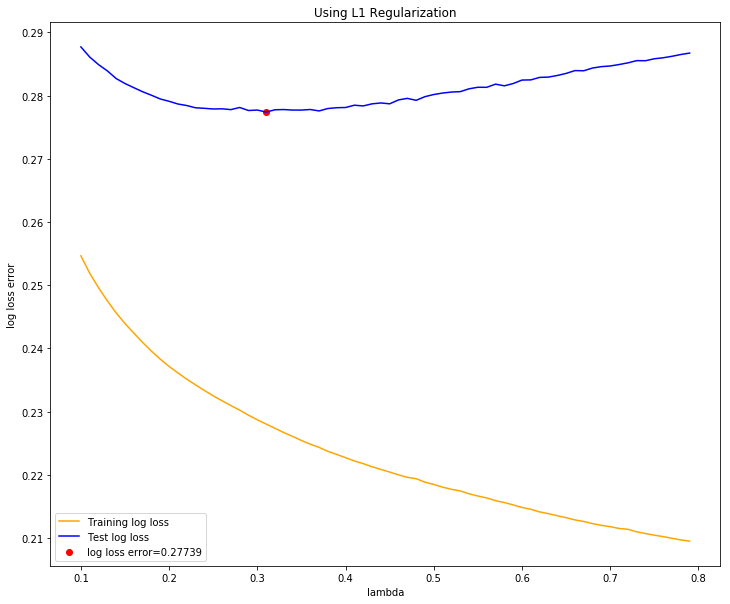

In [55]:
plt.figure(figsize=(12,10))
plt.plot(np.arange(0.1,0.8,0.01),train_ll_list,color='orange',label='Training log loss')
plt.plot(np.arange(0.1,0.8,0.01),test_ll_list,color='blue',label='Test log loss')
plt.xlabel('lambda')
plt.ylabel('log loss error')
plt.scatter(np.arange(0.1,0.8,0.01)[test_ll_list.index(min(test_ll_list))],min(test_ll_list),color='red',label='log loss error={:.5f}'.format(min(test_ll_list)))
plt.legend(loc='best')
plt.title('Using L1 Regularization')

#### L2 penalty

In [62]:
train_ll_list2=[]
test_ll_list2=[]
for i in np.arange(0.01,0.2,0.01):
    train_ll,test_ll,_,_=RidgeLR(sample_train,sample_test,[i])
    train_ll_list2.append(train_ll)
    test_ll_list2.append(test_ll)

Text(0.5,1,'Using L2 Regularization')

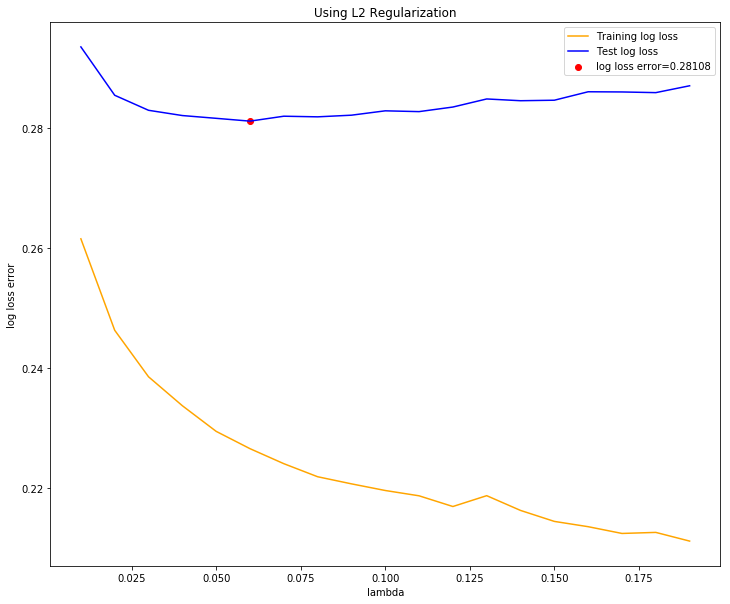

In [63]:
plt.figure(figsize=(12,10))
plt.plot(np.arange(0.01,0.2,0.01),train_ll_list2,color='orange',label='Training log loss')
plt.plot(np.arange(0.01,0.2,0.01),test_ll_list2,color='blue',label='Test log loss')
plt.xlabel('lambda')
plt.ylabel('log loss error')
plt.scatter(np.arange(0.01,0.2,0.01)[test_ll_list2.index(min(test_ll_list2))],min(test_ll_list2),color='red',label='log loss error={:.5f}'.format(min(test_ll_list2)))
plt.legend(loc='best')
plt.title('Using L2 Regularization')

#### In general, training log loss always decline as lambda increases. However, test log loss shows a U-shape. It declines at first, then start to increase again. As the testing log loss increase, it means the model starts overfitting. 

### The comparison between regularized model and non-regularized model

Resample training data and test data in each experiment.

In [68]:
reg_ll=[]
reg_ll2=[]
nreg_ll=[]
for i in range(20):
    sample_train,sample_test=resample(model_data,0.7)

    _,reg_test_ll,_,_=LassoLR(sample_train,sample_test,[0.3])
    
    _,reg_test_ll2,_,_=RidgeLR(sample_train,sample_test,[0.06])
        
    _,nreg_test_ll,_,_=LR_sklearn(sample_train,sample_test)
    
    reg_ll.append(reg_test_ll)   

    reg_ll2.append(reg_test_ll2)

    nreg_ll.append(nreg_test_ll)

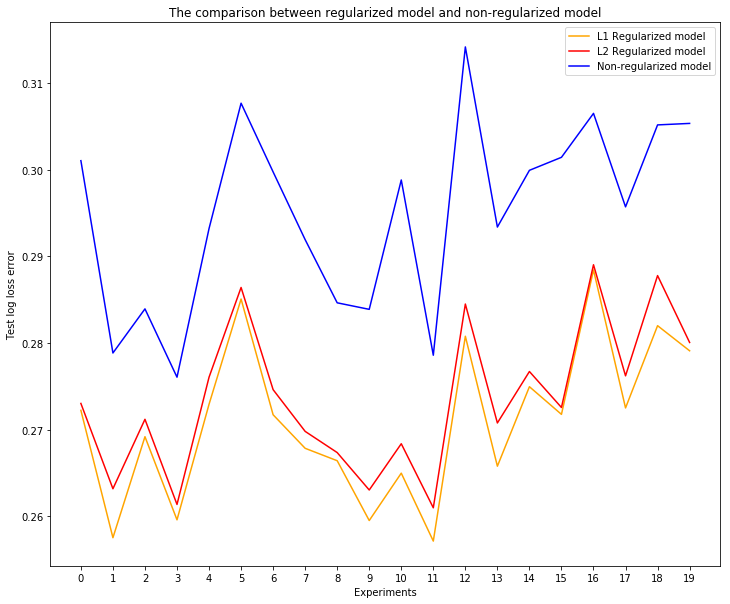

In [79]:
plt.figure(figsize=(12,10))
plt.plot(range(20),reg_ll,label='L1 Regularized model',color='orange')
plt.plot(range(20),reg_ll2,label='L2 Regularized model',color='red')
plt.plot(range(20),nreg_ll,label='Non-regularized model',color='blue')

plt.xlabel('Experiments')
plt.ylabel('Test log loss error')
plt.xticks([i for i in range(20)])
plt.title('The comparison between regularized model and non-regularized model')
plt.legend(loc='best')

#### After conducting mutiple experiments, we can see that L1 regularization model can mostly get better results

## Probability threshold tuning (Default is 0.5)

#### Now we are going to use different probability threshold to define poor status and compare the results

In [83]:
sample_train,sample_test=resample(model_data,0.7)

In [84]:
def show_result(train_ll,test_ll,train_sensitivity,test_sensitivity,train_specificity,test_specificity,train_acc,test_acc,train_matrix,test_matrix):
    print('Training log loss error is:',train_ll)
    print('Test log loss error is:',test_ll)
    print('')
    print('Sensitivity on training data is',train_sensitivity)
    print('Sensitivity on test data is',test_sensitivity)
    print('')
    print('Specificity on training data is',train_specificity)
    print('Specificity on test data is',test_specificity)
    print('')
    print('Accuracy on training data is',train_acc)
    print('Accuracy on test data is',test_acc)    
    print('')
    print('Confusion matrix on training data is')
    print(train_matrix)
    print('')
    print('Confusion matrix on test data is')
    print(test_matrix)

In [85]:
def LassoLR_threshold(sample_train,sample_test,params,threshold):
    X_train=sample_train.iloc[:,:-1]
    y_train=sample_train.iloc[:,-1]
    
    lrcv=LogisticRegressionCV(Cs=params,fit_intercept=True,cv=10,penalty='l1',scoring=None,solver='liblinear', tol=0.0001,class_weight=None,n_jobs=1,verbose=0,refit=True,multi_class='ovr',random_state=None)
    lrcv.fit(X_train,y_train)
    
    prob_train=lrcv.predict_proba(X_train)
    train_ll=log_loss(y_train,prob_train)
    
#    pred_train=lrcv.predict(X_train)
    pred_train=(prob_train[:,-1]>threshold)*1
    train_tn, train_fp, train_fn, train_tp=confusion_matrix(y_train.values,pred_train).ravel()
    train_acc=np.mean(pred_train==y_train)

    X_test=sample_test.iloc[:,:-1]
    y_test=sample_test.iloc[:,-1]
    
    prob_test=lrcv.predict_proba(X_test)
    test_ll=log_loss(y_test,prob_test)
    
#    pred_test=lrcv.predict(X_test)
    pred_test=(prob_test[:,-1]>threshold)*1
    test_tn, test_fp, test_fn, test_tp=confusion_matrix(y_test.values,pred_test).ravel()
    test_acc=np.mean(pred_test==y_test)

    train_matrix=pd.DataFrame({'Predicted: Not Poor':[train_tn, train_fn],'Predicted: Poor':[train_fp, train_tp]},index=['Actual: Not Poor','Actual: Poor'])
    
    test_matrix=pd.DataFrame({'Predicted: Not Poor':[test_tn, test_fn],'Predicted: Poor':[test_fp, test_tp]},index=['Actual: Not Poor','Actual: Poor'])
    
    train_sensitivity=train_tp/(train_tp+train_fn)
    train_specificity=train_tn/(train_tn+train_fp)
    
    test_sensitivity=test_tp/(test_tp+test_fn)
    test_specificity=test_tn/(test_tn+test_fp)
    
    show_result(train_ll,test_ll,train_sensitivity,test_sensitivity,train_specificity,test_specificity,train_acc,test_acc,train_matrix,test_matrix)

### Threshold is 0.5

In [86]:
LassoLR_threshold(sample_train,sample_test,[0.2,0.3,0.4],0.5)

Training log loss error is: 0.2397511077006199
Test log loss error is: 0.2686667285971981

Sensitivity on training data is 0.8929384965831435
Sensitivity on test data is 0.8709073900841908

Specificity on training data is 0.8986486486486487
Specificity on test data is 0.8864942528735632

Accuracy on training data is 0.8960292580982236
Accuracy on test data is 0.8797236895570906

Confusion matrix on training data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 2793              315
Actual: Poor                      282             2352

Confusion matrix on test data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 1234              158
Actual: Poor                      138              931


### Threshold is 0.6 

In [87]:
LassoLR_threshold(sample_train,sample_test,[0.2,0.3,0.4],0.6)

Training log loss error is: 0.2396601880830118
Test log loss error is: 0.2686728139627613

Sensitivity on training data is 0.8443432042520881
Sensitivity on test data is 0.8269410664172123

Specificity on training data is 0.9324324324324325
Specificity on test data is 0.9195402298850575

Accuracy on training data is 0.8920236851271334
Accuracy on test data is 0.8793173506704591

Confusion matrix on training data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 2898              210
Actual: Poor                      410             2224

Confusion matrix on test data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 1280              112
Actual: Poor                      185              884


### Threshold is 0.7

In [88]:
LassoLR_threshold(sample_train,sample_test,[0.2,0.3,0.4],0.7)

Training log loss error is: 0.2318109133475749
Test log loss error is: 0.2684152192105784

Sensitivity on training data is 0.7946089597570235
Sensitivity on test data is 0.7801683816651076

Specificity on training data is 0.9604247104247104
Specificity on test data is 0.9418103448275862

Accuracy on training data is 0.8843608498780913
Accuracy on test data is 0.8715969118244616

Confusion matrix on training data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 2985              123
Actual: Poor                      541             2093

Confusion matrix on test data is
                  Predicted: Not Poor  Predicted: Poor
Actual: Not Poor                 1311               81
Actual: Poor                      235              834


#### From the results above, the accuracy for different threshold did not have much difference, which is around 87%. We can conclude that the model is pretty robust, which means we are confident with our classfication results.

## Lesson Learn

#### 1. We succesfully implemented gradient descent to the logistic regression model and applied it to the real world dataset. The results we got are similar with the Python sciket-learn model

#### 2. We applied the regularization term in logitic regression model and also tuned the lambda parameter. Adding regularizatin term can help us get better results on test dataset. As for the lambda parameter, it performs a U-shape on the testing log loss while lambda becomes larger

#### 3. We used different probability threshhold to determine the poverty status. It comes out our model is pretty robust  because different threshold have similar results.

## Future Work

#### To more clearly capture the nonlinear relationship between predictors and response, we can further introduce a method which combines GBDT(Gradient Boosting Decision Tree) with logistic regression to build our model. Specifically, GBDT can perform interactions over predictors and then input the transformed features into the logistic regression model.